In [34]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import sparse
import copy
import pandas as pd

In [35]:
UniqueFileIndex = np.load("UniqueRows.npy")
Features = np.load("FileCompoundFeatures.npy")
MegaLabel = np.load("MegaLabelExtra.npy")
UniqueList = np.load("UniqueList.npy",allow_pickle = True)
ColumnNames = np.load("ColumnNames.npy", allow_pickle = True)
extraColumn = np.load("MSVDataSet.npy")

In [36]:
data = pd.read_csv("MSVData.csv") 

In [37]:
Features.shape

(34087, 13211)

In [38]:
MegaLabel = np.hstack((MegaLabel,extraColumn))

In [39]:
Features =Features[UniqueFileIndex,:]
MegaLabel = MegaLabel[UniqueFileIndex,:]

In [40]:
a = np.unique(MegaLabel[:,9],return_index = True)
MegaLabel = MegaLabel[a[1],:]
Features = Features[a[1],:]

In [41]:
ind = np.where(MegaLabel[:,5] != 100)[0]
MegaLabel = MegaLabel[ind,:]
Features = Features[ind,:]

In [42]:
MegaLabelTemp = copy.deepcopy(MegaLabel)

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

In [192]:
perm = np.random.permutation(19497)

In [193]:
lis = []
for k in range(1,8):
    print(k)
    length = k * 300
    clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1, class_weight = "balanced").fit(Features[perm[0:length],:], MegaLabelTemp[perm[0:length],5])
    lis.append(clf.score(Features[perm[15000:],:], MegaLabelTemp[perm[15000:],5]))

1
2
3
4
5
6
7


In [194]:
lis

[0.47075828329997776,
 0.6164109406270847,
 0.7000222370469201,
 0.7202579497442739,
 0.7478318879252835,
 0.7778519012675117,
 0.7938625750500333]

In [195]:
arr = np.arange(1,8)
arr = arr *300

In [197]:
csfont = {'fontname':'Times New Roman'}

(array([0.45, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85]),
 <a list of 9 Text yticklabel objects>)

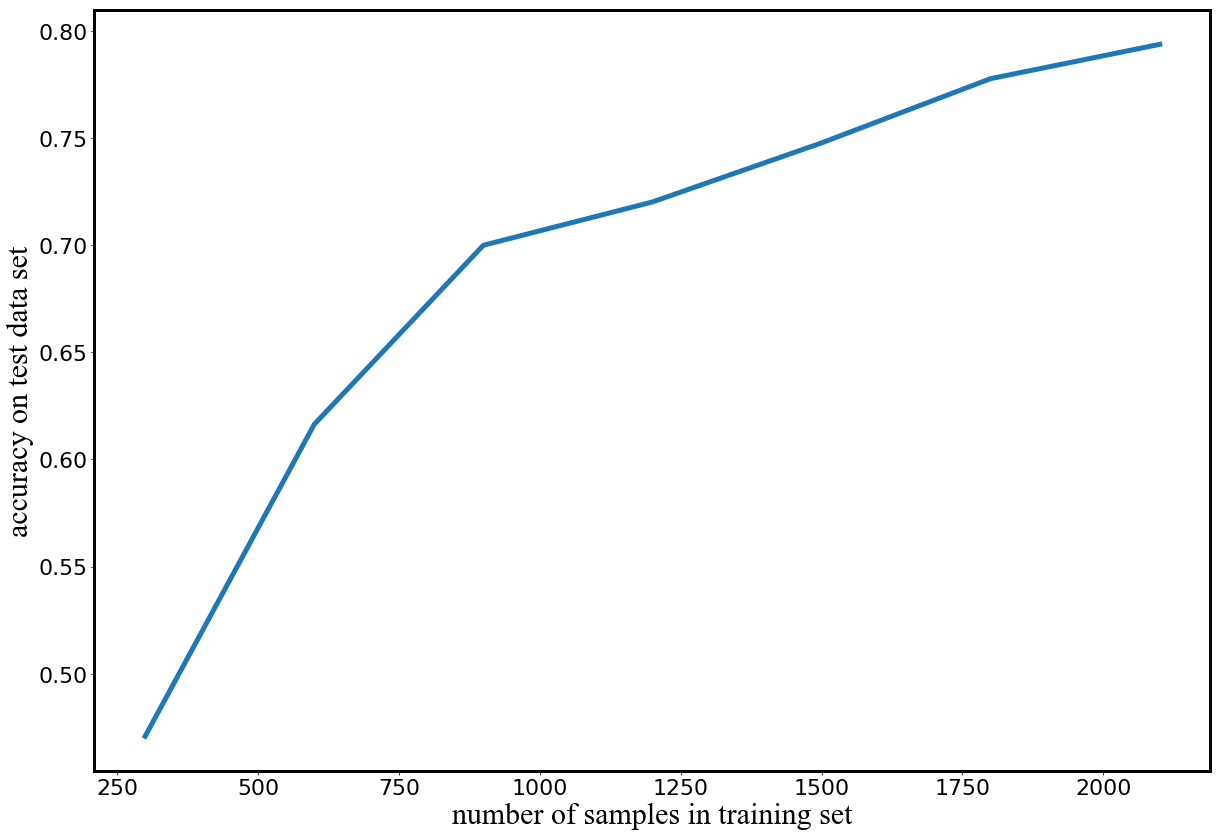

In [198]:
plt.rcParams['axes.linewidth'] = 3.0
fig = plt.figure(figsize = (20,14))
plt.plot(arr,lis,linewidth = 5.0)
plt.xlabel("number of samples in training set", fontsize = 30, **csfont) 
plt.ylabel("accuracy on test data set", fontsize = 30, **csfont)
plt.xticks(fontsize=22)
plt.yticks(fontsize=22)


In [199]:
fig.savefig("ClassificationIncreaseMSVDatasetSampleType.eps" , format='eps', dpi=1000)

In [44]:
#perm = np.random.permutation(19497)

In [45]:
#    clf = LogisticRegression(random_state=0, penalty = 'l1', C = .1, class_weight = "balanced").fit(Features[perm[0:15000],:], MegaLabelTemp[perm[0:15000],5])

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [46]:
#clf.score(Features[perm[15000:],:], MegaLabelTemp[perm[15000:],5])

0.8661329775405826

In [47]:
#A = np.zeros((19497,5)).astype('O')

In [52]:
#A[:,0] = np.sort(UniqueList[11])[MegaLabelTemp[perm,11].astype('int')]

In [53]:
#A[0:15000,1] = "Training"; A[15000:,1] = "Test"

In [55]:
#A[:,2] = np.sort(UniqueList[5])[clf.predict(Features[perm,:]).astype('int')]

In [57]:
#A[:,3] = np.sort(UniqueList[5])[MegaLabelTemp[perm,5].astype('int')]

In [59]:
#A[1000,:]

array(['f.MSV000080673/ccms_peak/2017.AmericanGut3K.mzXMLfiles/Samples/000031102_RH10_01_4521.mzML',
       'Training', 'Middle Adulthood (45 yrs < x <= 65 yrs)',
       'Middle Adulthood (45 yrs < x <= 65 yrs)', 0.0], dtype=object)

In [60]:
#B = np.chararray(19497,4)

In [63]:
#B = A

In [64]:
#fields = ["File Name", "Training or Test", "Predicted Value", "True Value" ]

In [65]:
#filename = "LifeStagePrediction.csv"

In [67]:
#import csv  
#with open(filename, 'w') as csvfile:  
    # creating a csv writer object  
#    csvwriter = csv.writer(csvfile)  
        
    # writing the fields  
#    csvwriter.writerow(fields)  
        
    # writing the data rows  
#    csvwriter.writerows(B) 